# SSE 1D Heisenberg

## I. Theory

The objective of the method is to calculate the expectation value of an observable $\hat{A}$ as follows:

$$
<\hat{A}> = \frac{1}{Z}Tr\left\{ \hat{A}e^{-\beta\hat{H}}\right\}
$$

with $Z = Tr\left\{ e^{-\beta\hat{H}}\right\}$.

The Hamiltonian is made up of a sum of non-commuting terms $\hat{H} = \sum^M_i \hat{H}_i , [\hat{H}_i,\hat{H}_j] \ne 0$ for any i, j

This trace can be rewritten in terms of a summation over the expectation values of product of Hamiltonian terms of a given order $n$ such as:

$$
Z = \sum^{\infty}_n \sum_{\{C_n\}} \frac{(-\beta)^n}{n!} Tr\left\{\prod^n_{j=1} \hat{H}_{l_j} \right\}
$$

Where $C_n$ gives all the possible combinations of product terms of bonds indices $(l_1,l_2,\dots,l_n)$ of order $n$ with $1\le l_i \le M$ where $M$ is the number of operators in the summation of the Hamiltonian terms $\hat{H}_i$.

With this reordering, the expectation value of an operator $<\hat{A}>$ can be written as:

$$
<\hat{A}> = \sum^{\infty}_n\sum_{\{C_n\}} A(C_n)W(C_n)
$$

where $A(C_n)$ and $W(C_n)$ are given by:

$$
A(C_n) =  Tr\left\{\hat{A}\prod^n_{j=1}\hat{H}_{l_j} \right\}\bigg/Tr\left\{\prod^n_{j=1}\hat{H}_{l_j} \right\} \ \text{if}\ W(C_n) \ne 0\\ 0,W(C_n) = 0
$$

$$
W(C_n) = \frac{1}{Z}\frac{(-\beta)^n}{n!}Tr\left\{\prod^n_{j=1}\hat{H}_{l_j} \right\}
$$

If the weights $W(C_n)$ are all positive, $<\hat{A}>$ can be sampled in a MC simulation and the value can be extracted.

$$
<\hat{A}> = <A(C_n)>_W
$$

The expectation value can be calculated by expanding the trace in terms of a basis representation which is chosen as a list of string with the $\hat{S}_{z_j}$ component of each site $\alpha=[S_1,S_2,\dots,S_N]$.

$$
<\hat{A}> = \frac{1}{Z}\sum_{\alpha}\sum^{L}_n \sum_{\{C_n\}} \frac{(-\beta)^n}{n!}<\alpha|\hat{A}\prod^{n}_{j=1}\hat{H}_{l_j}|\alpha>
$$

## II. Algorithm

The states are represented as a list of the per site $S^z_i$ values as follows:

$$
|\alpha> = |S^z_1,S^z_2,\dots,S^z_N>
$$

The Heisenberg Hamiltonian given below is simplified as follows

$$
\hat{H} = \sum^{B}_{b=1} \left[ \hat{S}^z_{i(b)}\cdot\hat{S}^z_{j(b)} + \frac{1}{2} \left( S^+_{i(b)}\cdot S^-_{j(b)} + S^-_{i(b)}\cdot S^+_{j(b)} \right) \right]
$$

The two parts of the Hamiltonian are broken down and shifted in order to make all the expectation values non-negative.

$$
\hat{H}_{1,b} = \frac{1}{4} - \hat{S}^z_{i(b)}\cdot\hat{S}^z_{j(b)} \\ \hat{H}_{2,b} = \frac{1}{2} \left( S^+_{i(b)}\cdot S^-_{j(b)} + S^-_{i(b)}\cdot S^+_{j(b)} \right) 
$$

Therefore, the Hamiltonian is written as:

$$
\hat{H} = -\sum^B_{b=1}\sum^2_a \left[ \hat{H}_{a,b} \right]
$$

with a phase convention for the off-diagonal operators.

The SSE operator products in the partition function are given by
$$
\prod^M_p \hat{H}_{a(p),b(p)}
$$

The lists $a(p)$ and $b(p)$ are stored in a vector which give the operators acting at each time step $p$

and the operator string is given by $opstring(p) = 2 b(p) + a(p) - 1$ with the identity represented by $0$.

In [357]:
MaxM = 12

a = zeros(MaxM)
a[1]=1
a[3]=2
a[4]=2
a[5]=1
a[8]=1
a[9]=2
a[11]=2
a[12]=1
b = zeros(MaxM)
b[1]=2
b[3]=4
b[4]=6
b[5]=3
b[8]=2
b[9]=6
b[11]=4
b[12]=7
opstring = zeros(MaxM)
bsites = makeBsites(Nsites)
buildOpstring!(opstring,a,b)
print("i  \t a \t b \topstring\n\n")
for i in 1:MaxM
    print(i,">","\t",a[i],"\t",b[i],"\t",opstring[i],"\n")
end

i  	 a 	 b 	opstring

1>	1.0	2.0	4.0
2>	0.0	0.0	0.0
3>	2.0	4.0	9.0
4>	2.0	6.0	13.0
5>	1.0	3.0	6.0
6>	0.0	0.0	0.0
7>	0.0	0.0	0.0
8>	1.0	2.0	4.0
9>	2.0	6.0	13.0
10>	0.0	0.0	0.0
11>	2.0	4.0	9.0
12>	1.0	7.0	14.0


The configuration is stored in the spin variable which contains $spin[i] = 2S^z_i$

In [358]:
spin = 1.0*[1; 1; -1; -1; 1; -1; 1; -1]
print("Spin = ")
for i in 1:8
    print(spin[i]," ")
end
print("\n")

Spin = 1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 -1.0 


The connection of pair of spins to a bond is stored in $bsites$ which is a $MaxM x 2$ matrix with $bsites[b,1]$ giving the ms of the 1st site and $bsites[b,2]$ giving the ms of the second site.


In [144]:
Nsites = 8
makeBsites(Nsites)

7×2 Array{Float64,2}:
 1.0  2.0
 2.0  3.0
 3.0  4.0
 4.0  5.0
 5.0  6.0
 6.0  7.0
 7.0  8.0

### a.) Visualize SSE config

An example of an SSE configuration and propagated states for $M=12$ and $8$ sites is shown below.

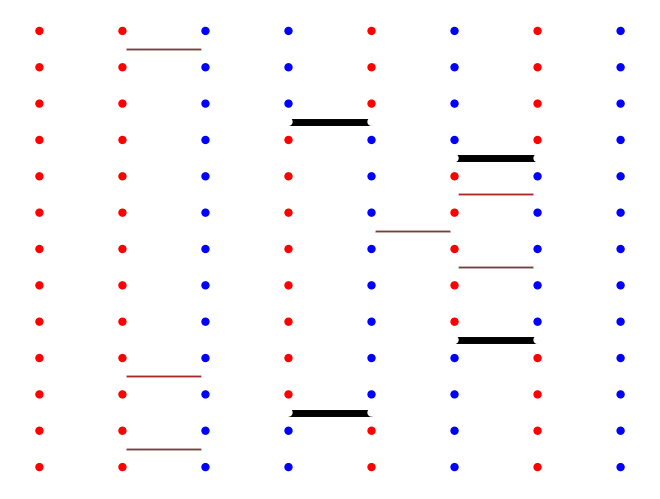

    1.0       1.0       -1.0       -1.0       1.0       -1.0       1.0       -1.0       

PyObject <matplotlib.collections.LineCollection object at 0x160d989e8>

In [367]:
drawSSEConfig(Nsites,MaxM,a,b,spin)

### b.) Make vertex list

The most important function to build then is the loop calculation algorithm which gives the list of all the closed loops for a given SSE configuration.

In [368]:
vlist = makeVertexList(a,b)
printVertexList(vlist)



l = 	  1			  2			  3			  4			  

	 [1]	39.0		 [2]	40.0		 [3]	37.0		 [4]	38.0	
	 [5]	0.0		 [6]	0.0		 [7]	0.0		 [8]	0.0	
	 [9]	43.0		 [10]	44.0		 [11]	41.0		 [12]	21.0	
	 [13]	24.0		 [14]	20.0		 [15]	17.0		 [16]	18.0	
	 [17]	15.0		 [18]	16.0		 [19]	22.0		 [20]	26.0	
	 [21]	12.0		 [22]	19.0		 [23]	42.0		 [24]	25.0	
	 [25]	24.0		 [26]	20.0		 [27]	33.0		 [28]	34.0	
	 [29]	0.0		 [30]	0.0		 [31]	0.0		 [32]	0.0	
	 [33]	27.0		 [34]	28.0		 [35]	22.0		 [36]	26.0	
	 [37]	3.0		 [38]	4.0		 [39]	45.0		 [40]	46.0	
	 [41]	11.0		 [42]	23.0		 [43]	9.0		 [44]	10.0	
	 [45]	39.0		 [46]	40.0		 [47]	37.0		 [48]	38.0	


### c.) Make loop list

Finally, all the closed loops need to be calculated for a given $opstring$ and set of bonds $b$ acting on a configuration $spin$

For the above SSE configuration, the only big closed loop is:

In [369]:
findLoops(vlist,3,4)

7-element Array{Any,1}:
  3
  6
  5
  7
  6
 11
  3

In [366]:
n=size(a[findall(x->x==1,a)])[1]
print(n)
β = 1.001
n = diagUpdate!(a,b,opstring,spin,bsites,n,MaxM,Nsites,β)
printmat(a)
printmat(b)
printmat(opstring)
print("\n",n)

0
12-element Array{Float64,1}:
 1.0
 0.0
 2.0
 2.0
 1.0
 1.0
 1.0
 0.0
 2.0
 1.0
 2.0
 1.0
12-element Array{Float64,1}:
 2.0
 0.0
 4.0
 6.0
 6.0
 5.0
 6.0
 0.0
 6.0
 2.0
 4.0
 2.0
12-element Array{Float64,1}:
  4.0
  0.0
  9.0
 13.0
 12.0
 10.0
 12.0
  0.0
 13.0
  4.0
  9.0
  4.0
6

## III. Updates

The first type of update is the diagonal update where a $\hat{S}^z_b(p)$ operator is put for a randomly chosen bond $b$ and this is carried out for each time dimension $p$. 

The condition for adding a diagonal operator $\hat{S}^z_b(p)$ is that the two spins making up the bond $b$ i.e. $S_{i(b)}$ and $S_{j(b)}$ should be unequal i.e. the spins should be anti-parallel.

In [327]:
MaxM = 12
a = zeros(MaxM)
b = zeros(MaxM)
opstring = zeros(MaxM)
β = 0.1
n = 0
M = 12
Nsites = 8
spin = [(i-0.5)/abs(i-0.5) for i in rand(Nsites)]
bsites = makeBsites(Nsites)
print("spin = ",spin,"\n")
printmat(bsites)
diagUpdate!(a,b,opstring,spin,bsites,n,MaxM,Nsites,β)
printmat(a)
printmat(b)
printmat(opstring)

spin = [1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0]

7×2 Array{Float64,2}:
 1.0  2.0
 2.0  3.0
 3.0  4.0
 4.0  5.0
 5.0  6.0
 6.0  7.0
 7.0  8.0
12-element Array{Float64,1}:
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
12-element Array{Float64,1}:
 6.0
 0.0
 0.0
 3.0
 0.0
 3.0
 0.0
 0.0
 0.0
 6.0
 3.0
 0.0
12-element Array{Float64,1}:
 12.0
  0.0
  0.0
  6.0
  0.0
  6.0
  0.0
  0.0
  0.0
 12.0
  6.0
  0.0

----------

# Function definitions

## 1.) buildOpstring

In [2]:
"""
Build opstring given the operator list a and b
"""
function buildOpstring!(opstring,a,b)
    dim = length(a);
    eye = ones(dim);
    idxa = a .== 0;
    idxb = b .== 0;
    eye[idxa] .= 0;
    opstring .= 2 * b + a - eye;
end

buildOpstring!

## 2.) Printmatrix

In [4]:
function printmat(mat)
    print("\n")
    show(Base.stdout, MIME"text/plain"(),mat)
end

printmat (generic function with 1 method)

## 3.) Bsites

In [106]:
"""
Make Bsites for 1D Heisenberg\n
Nsites - the number of sites
"""
function makeBsites(Nsites)
    bsites = zeros(Nsites-1,2)
    bsites[:,1] = 1:Nsites-1
    bsites[:,2] = 2:Nsites
    return bsites
end


makeBsites

## 4.) Make graph with a given a and b

In [49]:
using ImageView, Images, TestImages
using PyPlot
using PyCall

"""
Draw SSE configuration with given
a(p) and b(p) operators.
Nsites - number of sites
MaxM - number of time steps
a - the op type
b - the bond id for each op
spin - the configuration list
"""
function drawSSEConfig(Nsites,MaxM,a,b,spin)
    # draw the given opstring


    nx = pyimport("networkx")

    m=2MaxM + 1
    n=Nsites

    G = nx.grid_2d_graph(n,m); # n, m grid 
    pos = Dict( (n, n) for n in G.nodes() );

    color_map=[]
    countcolor=1
    for i in 0:n-1
        for j in 0:m-1
            if countcolor%2 == 0
                push!(color_map,"white")
            else
                push!(color_map,"blue")
            end
            countcolor+=1
        end
        countcolor+=1
    end

    for j in 0:m-2
        for i in 0:n-2
            G.remove_edge((i,j),(i+1,j))
            G.remove_edge((i,j),(i,j+1))
        end
        G.remove_edge((n-1,j),(n-1,j+1))
    end
    for i in 0:n-2
        G.remove_edge((i,m-1),(i+1,m-1))
    end

    # make the ops by looping over the imaginary time axis
    # use a for the time direction and b for the space dimension
    #G.add_edge((0,m-2),(1,m-2))
    width=[]
    edge_color=[]
    for i in 1:MaxM
        if a[i] != 0 && b[i] < Nsites
            J = m-2*i
            I = trunc(Int,b[i]-1)
 #           print(I,"\t",J,"\n")
            if a[i]==1
                G.add_edge((I,J),(I+1,J))
                push!(width,1.0)
                push!(edge_color,"brown")
            else
                G.add_edge((I,J),(I+1,J))
                push!(width,5.0)
                push!(edge_color,"black")
            end
        end
    end


    edges=[]
    edge_color=[]
    width=[]
    for (i,edge) in enumerate(G.edges)
    #    edges[edge]=i
        push!(edges,edge)
        J = edge[2][1]
        I = trunc(Int,MaxM-(edge[2][2]-1)/2)
        if a[I]==2
            push!(width,5.0)
            push!(edge_color,"black")
        else
            push!(width,1.0)
            push!(edge_color,"brown")
        end
    end

    for j in 1:MaxM    
        J = m-2*(j-1)        
        for i in 0:n-1
            I=i
    #        print(J," ",I,"\t",J*(m-1)+I,"\n")
            if spin[i+1] == 1
                color_map[I*(m) + J] = "red"
            else
                color_map[i*(m) + J] = "blue"
            end
        end
        if a[j]==2
            for i in 0:n-1
                if b[j]==i+1
                    spin[i+1]*=-1
                    spin[i+2]*=-1
                end
            end 
        end
    end
    for i in 0:n-1
            J=m-2*(MaxM)
            I=i
            if spin[i+1] == 1
                color_map[I*(m) + J] = "red"
            else
                color_map[i*(m) + J] = "blue"
            end
     end

    print("    ")
    for i in 1:Nsites
        print(spin[i],"       ")
    end

    nx.draw(G,pos,node_color=color_map, font_color="white",node_size=25);
    nx.draw_networkx_edges(G,pos,edgelist=edges,width=width,edge_color=edge_color);
end

drawSSEConfig

## 5.) Make vertex list

In [287]:
"""
Function to build the vertex list
a - the op types 
b - the bonds for each op
"""
function makeVertexList(a,b)
    # find the number of operators
    # and their locations
    op_ids = findall(x->x > 0,a)
#    print("Ids     =","\t",op_ids,"\n")
    num_op = size(op_ids)[1]

    # get bond corresponding to each operator
    bond_op = b[op_ids]
#    print("bond Id =","\t",bond_op,"\n")

    # get bond type
    bond_type = a[op_ids]
#    print("bond Type=","\t",bond_type,"\n")

    # make bond list which holds the ids of the ops
    # which act on the same bond before and after the
    # current op id
    same_bond_list = zeros(num_op,4)
    for i in 1:num_op
        bid = bond_op[i]
        idlist_same_bids = findall(x->x==bid,bond_op)
        num_same_bid = size(idlist_same_bids)[1]
        idcurrent = findall(x->x==i,idlist_same_bids)[1]
    #    print(i,"\t",idlist_same_bids,"\t",idcurrent)
        if num_same_bid > 1
            if idcurrent > 1 && idcurrent < num_same_bid
    #            print("\t,","prev=",idlist_same_bids[idcurrent-1],"\t next=",idlist_same_bids[idcurrent+1],"\n")
                same_bond_list[i,2] = idlist_same_bids[idcurrent-1]
                same_bond_list[i,1] = i
                same_bond_list[i,3] = idlist_same_bids[idcurrent+1]
                same_bond_list[i,4] = 2
            elseif idcurrent == 1
    #            print("\t","next=",idlist_same_bids[idcurrent+1],"\n")
                same_bond_list[i,1] = 3
                same_bond_list[i,3] = idlist_same_bids[idcurrent+1]
                same_bond_list[i,4] = 1
            elseif idcurrent == num_same_bid
    #            print("\t","prev=",idlist_same_bids[idcurrent-1],"\n")
                same_bond_list[i,2] = idlist_same_bids[idcurrent-1]
                same_bond_list[i,1] = 2
                same_bond_list[i,4] = 1
            end
        else
    #        print("\n")
        end
    end
    #printmat(same_bond_list)

    # make the list of op ids which act on bond ids
    # one before and one after the current bond id
    # e.g.
    # -a-
    #   |
    #   |    -b-
    #   |    |
    #   1    2
    #    ----
    #   3    4
    #   |    |
    # -c-    |
    #         -d-
    #
    # the stored indices will be [1,2,4,5] each for the
    # four legs
    print("\n")
    diff_bond_list = zeros(num_op,4)
    for i in 1:num_op
        bid = bond_op[i]
        if bid > 1 && bid < num_op
            # first do the prev bond
            idlist_prev_bid = findall(x->x==(bid-1),bond_op)
            num_prev_bid = size(idlist_prev_bid)[1]
            
#            print(i," prev=",idlist_prev_bid,"\t")

            if num_prev_bid > 0
                # get the ids which are adjascent to the
                # current id
                ids_adjascent_prev = [searchsortedlast(idlist_prev_bid,i),searchsortedfirst(idlist_prev_bid,i)]
#                print("Lsearch Ids=",ids_adjascent_prev,"\t")
                diag_up = trunc(Int,same_bond_list[i,2])
                diag_dn = trunc(Int,same_bond_list[i,3])
                if ids_adjascent_prev[1] > 0 && ids_adjascent_prev[2] < num_prev_bid + 1               
                    ids_adjascent_prev = ids_adjascent_prev[findall(x->x>0,ids_adjascent_prev)]
                    ids_adjascent_prev = ids_adjascent_prev[findall(x->x<num_prev_bid+1,ids_adjascent_prev)]
                    num_prev_bid = size(ids_adjascent_prev)[1]
                    if diag_dn < idlist_prev_bid[ids_adjascent_prev[2]] && diag_dn > 0
                        if diag_up > idlist_prev_bid[ids_adjascent_prev[1]]
                            ids_adjascent_prev = []
                            num_prev_bid = 0
                        else
                            ids_adjascent_prev = [ids_adjascent_prev[1]]
                            num_prev_bid = 1
                        end
                    elseif diag_up > idlist_prev_bid[ids_adjascent_prev[1]]
                        ids_adjascent_prev = [ids_adjascent_prev[2]]
                        num_prev_bid = 1                      
                    end
                    winded_bond = false
                elseif ids_adjascent_prev[1] == 0
                    if diag_dn > idlist_prev_bid[1] || diag_dn == 0
                        ids_adjascent_prev = ids_adjascent_prev[findall(x->x>0,ids_adjascent_prev)]
                        ids_adjascent_prev = ids_adjascent_prev[findall(x->x<num_prev_bid+1,ids_adjascent_prev)]
                        num_prev_bid = size(ids_adjascent_prev)[1]
                        winded_bond = false                    
                    else
                        # if there are no diagonal terms above this then we take the 
                        # last one on the next list
                        if same_bond_list[i,2] == 0.0
                            ids_adjascent_prev = [size(idlist_prev_bid)[1]]
                            num_prev_bid = 1
                            winded_bond = true
                        else
                            ids_adjascent_prev = []
                            num_next_bid = 0
                        end                    
                    end
                elseif ids_adjascent_prev[2] == num_prev_bid + 1
                    if diag_up < idlist_prev_bid[end]
#                        print("L cond 3 ",i,"\t")
                        ids_adjascent_prev = ids_adjascent_prev[findall(x->x>0,ids_adjascent_prev)]
                        ids_adjascent_prev = ids_adjascent_prev[findall(x->x<num_prev_bid+1,ids_adjascent_prev)]
                        num_prev_bid = size(ids_adjascent_prev)[1]
#                        print(ids_adjascent_prev,"\t")
                        winded_bond = false 
                        if diag_dn == 0 && diag_up > idlist_prev_bid[1]
                            p_dn = op_ids[idlist_prev_bid[1]]
                            diff_bond_list[i,3] = 4*(p_dn - 1) + 2
                        end
                    else
                        # if there are no diagonal terms below then 
                        # the winded leg attaches to the first of the next bid
                        if same_bond_list[i,3] == 0.0
                            ids_adjascent_prev = [1]
                            num_next_bid = 1
                            winded_bond = true
                        else
                            ids_adjascent_prev = []
                            num_next_bid = 0
                        end                    
                    end
                end
            end

            # next do the next bond
            idlist_next_bid = findall(x->x==(bid+1),bond_op)
            num_next_bid = size(idlist_next_bid)[1]

#            print(i," next=",idlist_next_bid,"\t")

            if num_next_bid > 0
                ids_adjascent_next = [searchsortedlast(idlist_next_bid,i),searchsortedfirst(idlist_next_bid,i)]
#                print("Rsearch Ids=",ids_adjascent_next,"\t")
                diag_up = trunc(Int,same_bond_list[i,2])
                diag_dn = trunc(Int,same_bond_list[i,3])
    #            print("up dn ",diag_up," ",diag_dn,"\t")
                if ids_adjascent_next[1] > 0 && ids_adjascent_next[2] < num_next_bid + 1 
                    # found two 
    #                print(ids_adjascent_next,"\t")
                    ids_adjascent_next = ids_adjascent_next[findall(x->x>0,ids_adjascent_next)]
                    ids_adjascent_next = ids_adjascent_next[findall(x->x<num_next_bid+1,ids_adjascent_next)]
                    num_next_bid = size(ids_adjascent_next)[1]
                    if diag_dn < idlist_next_bid[ids_adjascent_next[2]] && diag_dn > 0
                        if diag_up > idlist_next_bid[ids_adjascent_next[1]]
                            ids_adjascent_next = []
                            num_next_bid = 0
                        else
                            ids_adjascent_next = [ids_adjascent_next[1]]
                            num_next_bid = 1
                        end
                    elseif diag_up > idlist_next_bid[ids_adjascent_next[1]]
                        ids_adjascent_next = [ids_adjascent_next[2]]
                        num_next_bid = 1                     
                    end
                    winded_bond = false
                elseif ids_adjascent_next[1] == 0
                    if diag_dn > idlist_next_bid[1] || diag_dn == 0
                        ids_adjascent_next = ids_adjascent_next[findall(x->x>0,ids_adjascent_next)]
                        ids_adjascent_next = ids_adjascent_next[findall(x->x<num_next_bid+1,ids_adjascent_next)]
                        num_next_bid = size(ids_adjascent_next)[1]
                        winded_bond = false                     
                    else
                        # if there are no diagonal terms above this then we take the 
                        # last one on the next list
                        if same_bond_list[i,2] == 0.0
                            ids_adjascent_next = [size(idlist_next_bid)[1]]
                            num_next_bid = 1
                            winded_bond = true
                        else
                            ids_adjascent_next = []
                            num_next_bid = 0
                        end
                    end
                elseif ids_adjascent_next[2] == num_next_bid + 1
                    if diag_up < idlist_next_bid[end]
                        ids_adjascent_next = ids_adjascent_next[findall(x->x>0,ids_adjascent_next)]
                        ids_adjascent_next = ids_adjascent_next[findall(x->x<num_next_bid+1,ids_adjascent_next)]
                        num_next_bid = size(ids_adjascent_next)[1]
                        winded_bond = false        
                        if diag_up == 0 && diag_dn > idlist_next_bid[1]
                            p_dn = op_ids[idlist_next_bid[1]]
                            diff_bond_list[i,4] = 4*(p_dn - 1) + 1
                        end                     
                    else
                        # if there are no diagonal terms below then 
                        # the winded leg attaches to the first of the next bid
                        if same_bond_list[i,3] == 0.0
                            ids_adjascent_next = [1]
                            num_next_bid = 1
                            winded_bond = true
                        else
                            ids_adjascent_next = []
                            num_next_bid = 0
                        end
                    end
                end
            end   

    #        print(i,"\t",idlist_next_bid,"\t",num_prev_bid," ",num_next_bid,"\n")

            if num_prev_bid == 1


                # now save the bond ids for the prev
                if winded_bond
                    if idlist_prev_bid[ids_adjascent_prev[1]] > i
                        p_up = op_ids[idlist_prev_bid[ids_adjascent_prev[1]]]
                        diff_bond_list[i,1] = 4*(p_up - 1) + 4
                    else
                        p_dn = op_ids[idlist_prev_bid[ids_adjascent_prev[1]]]
                        diff_bond_list[i,3] = 4*(p_dn - 1) + 2
                    end                
                else                
                    if idlist_prev_bid[ids_adjascent_prev[1]] > i
                        p_dn = op_ids[idlist_prev_bid[ids_adjascent_prev[1]]]
                        diff_bond_list[i,3] = 4*(p_dn - 1) + 2
                    else
                        p_up = op_ids[idlist_prev_bid[ids_adjascent_prev[1]]]
                        diff_bond_list[i,1] = 4*(p_up - 1) + 4
                    end
                end


            elseif num_prev_bid == 2

                # now save the bond ids for the next            
                p_up = op_ids[idlist_prev_bid[ids_adjascent_prev[1]]]
                diff_bond_list[i,1] = 4*(p_up - 1) + 4
                p_dn = op_ids[idlist_prev_bid[ids_adjascent_prev[2]]]
                diff_bond_list[i,3] = 4*(p_dn - 1) + 2

            end

            if num_next_bid == 1

                # now save the bond ids for the next
                if winded_bond
                    if idlist_next_bid[ids_adjascent_next[1]] > i
                        p_up = op_ids[idlist_next_bid[ids_adjascent_next[1]]]
                        diff_bond_list[i,2] = 4*(p_up - 1) + 3
                    else
                        p_dn = op_ids[idlist_next_bid[ids_adjascent_next[1]]]
                        diff_bond_list[i,4] = 4*(p_dn - 1) + 1
                    end
                else
                    if idlist_next_bid[ids_adjascent_next[1]] > i
                        p_dn = op_ids[idlist_next_bid[ids_adjascent_next[1]]]
                        diff_bond_list[i,4] = 4*(p_dn - 1) + 1
                    else
                        p_up = op_ids[idlist_next_bid[ids_adjascent_next[1]]]
                        diff_bond_list[i,2] = 4*(p_up - 1) + 3
                    end
                end


            elseif num_next_bid == 2

                # now save the bond ids for the next
                p_up = op_ids[idlist_next_bid[ids_adjascent_next[1]]]
                diff_bond_list[i,2] = 4*(p_up - 1) + 3
                p_dn = op_ids[idlist_next_bid[ids_adjascent_next[2]]]
                diff_bond_list[i,4] = 4*(p_dn - 1) + 1

            end

        elseif bid == 1

        elseif bid == num_op
        end
    end
    #printmat(diff_bond_list)

    # Now append the list with the diagonal terms
    # fill up the missing index connections
    print("\n")
    for i in 1:num_op
        id_zeros = findall(x->x==0,diff_bond_list[i,1:end])
        id_op_ids = findall(x->x>0,diff_bond_list[i,1:end])
        num_zeros = size(id_zeros)[1]
        num_ops = size(id_op_ids)[1]
    #    print("\n",i,"\t",num_zeros,"\t")
        if num_zeros > 0
            ndiag = trunc(Int,same_bond_list[i,4])
            pos = trunc(Int,same_bond_list[i,1])
    #        print(ndiag,"\t pos=",pos,"\t")
            if ndiag==0
                # case of no diag ops
                opid = i

                # 1 diag op below => pos == 2
                # 1 diag op above => pos == 3
                if diff_bond_list[i,1] == 0
                    p_up = op_ids[opid]
                    diff_bond_list[i,1] = 4*(p_up - 1) + 3
                end
                if diff_bond_list[i,2] == 0
                    p_up = op_ids[opid]
                    diff_bond_list[i,2] = 4*(p_up - 1) + 4
                end
                if diff_bond_list[i,3] == 0
                    p_dn = op_ids[opid]
                    diff_bond_list[i,3] = 4*(p_dn - 1) + 1
                end
                if diff_bond_list[i,4] == 0
                    p_dn = op_ids[opid]
                    diff_bond_list[i,4] = 4*(p_dn - 1) + 2
                end 

            elseif ndiag==1
                # case of 1 diag op
                opid = trunc(Int,same_bond_list[i,pos])

                # 1 diag op below => pos == 2
                # 1 diag op above => pos == 3
                if diff_bond_list[i,1] == 0
                    p_up = op_ids[opid]
                    diff_bond_list[i,1] = 4*(p_up - 1) + 3
                end
                if diff_bond_list[i,2] == 0
                    p_up = op_ids[opid]
                    diff_bond_list[i,2] = 4*(p_up - 1) + 4
                end
                if diff_bond_list[i,3] == 0
                    p_dn = op_ids[opid]
                    diff_bond_list[i,3] = 4*(p_dn - 1) + 1
                end
                if diff_bond_list[i,4] == 0
                    p_dn = op_ids[opid]
                    diff_bond_list[i,4] = 4*(p_dn - 1) + 2
                end  

            elseif ndiag==2
                # case of 2 diag op
#                print(" 2diag ")
                opid_dn = trunc(Int,same_bond_list[i,3])
                opid_up = trunc(Int,same_bond_list[i,2])
#                print(opid_up,"\t",opid_dn,"\n")
                if diff_bond_list[i,1] == 0
                    p_up = op_ids[opid_up]
                    diff_bond_list[i,1] = 4*(p_up - 1) + 3
                end
                if diff_bond_list[i,2] == 0
                    p_up = op_ids[opid_up]
                    diff_bond_list[i,2] = 4*(p_up - 1) + 4
                end
                if diff_bond_list[i,3] == 0
                    p_dn = op_ids[opid_dn]
                    diff_bond_list[i,3] = 4*(p_dn - 1) + 1
                end
                if diff_bond_list[i,4] == 0
                    p_dn = op_ids[opid_dn]
                    diff_bond_list[i,4] = 4*(p_dn - 1) + 2
                end
            end
    end
    end
    #printmat(diff_bond_list)

    # finally make vertexlist
    vertexlist = zeros(MaxM,4)
    j=0
    for i in 1:MaxM
        if a[i] > 0
            j += 1
            vertexlist[i,:] = diff_bond_list[j,:]
        end
    end
    return(vertexlist)
end

makeVertexList

## 6.) Print vertex list


In [74]:
"""
Print a given vertex list
vlist - the vertex list
"""
function printVertexList(vlist)  
    print("l = \t  ")
    for i in 1:4
        print(i,"\t\t\t  ")
    end
    print("\n\n")
    for i in 1:MaxM
        for j in 1:4
            print("\t [",4*(i-1) + j,"]","\t",vlist[i,j],"\t")
        end
        print("\n")
    end
end

printVertexList

## 7.) Find closed loop

In [300]:
"""
Find closed loops in the given SSE configuration
specified by vertex list
vertexlist - the current vertex list
startId - the id of the starting bond
legId - the id of the leg (=0,1,2,3) of the starting bond
"""
function findLoops(vertexlist,startId,legId)
    # construct a loop by traversing the vertexlist.
    # The rule is simply to follow the two steps:
    #     1. start by picking an element of vertexlist(p)
    #     2. go to the index pointed to by p
    #     3. if l(p) == 1 move to 2 or if l(p) == 2 move to 1 and similarly for 3,4
    #     4. go to vertexlist(p') and continue from step 1

    move = Dict()
    move[1]=2
    move[2]=1
    move[3]=4
    move[4]=3

    lpmove = Dict()
    lpmove[0]=4
    lpmove[1]=1
    lpmove[2]=2
    lpmove[3]=3
    
    pstart = startId
    p = startId
    lp = legId
#    print("pstart=",p,"\t","lpstart=",lp,"\n")
    
    q = 0
    v = 0
    loopids = []
    push!(loopids,p)
    count = 1
    while q != pstart # && count < 10
        v = vertexlist[p,lp]
        lp = lpmove[trunc(Int,v%4)]
        p = trunc(Int,1 + (v-lp)/4)
#        print(">",p,"\t",lp,"\t",v,"\n")
        lp = move[lp]
        q = p
        lq = lp
        count += 1
#        print(count,"\t",p,"\t",lp,"\t v=",4*(p-1)+lp,"\n")
        push!(loopids,p)
    end
    return(loopids)
end

findLoops

## 8.) Diagonal update

In [344]:
import Random

"""
Get diag update addition probability
"""
function diagProbAdd(B,β,M,n)
    return (min((B*β/2)/(M-n),1))
end

"""
Get diag update removal probability
"""
function diagProbRemove(B,β,M,n)
    return (min((M-n+1)/(B*β/2),1))
end

#Random.seed!(1234)
"""
Return a random number [0,1)
"""
function getRand()
    return rand()
end

"""
The function that implements diagonal update\n
a - bond type
b - bond id
opstring - combind bond type and id
spin - the spin configuration
bsites - site list for each bond
MaxM - the time dimension
Nsites - number of sites
β - time step
"""
function diagUpdate!(a,b,opstring,spin,bsites,n,MaxM,Nsites,β)
#    Random.seed!(1001)
    B = Nsites-1
    for i in 1:MaxM
        rnd = getRand()
        bnd = trunc(Int,B*rnd)+1
#        print(">",rnd,"\t",bnd,"\t")
        spin1 = spin[trunc(Int,bsites[bnd,1])]
        spin2 = spin[trunc(Int,bsites[bnd,2])]
#        print(i,"\t",bnd,"\t",spin1,"\t",spin2)
#        printmat(spin)
#        print("\n")
        if spin1 != spin2 && a[i] == 0
            probAc = diagProbAdd(B,β,MaxM,n)
            rnd = getRand()
            if rnd > probAc
                # accept update
                b[i] = bnd
                a[i] = 1
                opstring[i] = 2 * bnd
                n += 1
            end
        elseif a[i] == 1
            probRm = diagProbRemove(B,β,MaxM,n)
            rnd = getRand()
            if rnd > probRm
                # remove bond
                b[i] = 0.0
                a[i] = 0.0
                opstring[i] = 0.0
                n -= 1
            end
        end
        if a[i] == 2
            # propagate the state
            spin[trunc(Int,bsites[trunc(Int,b[i]),1])] *=-1
            spin[trunc(Int,bsites[trunc(Int,b[i]),2])] *=-1
        end
    end
    return n
end

diagUpdate!